## *Лабораторна робота №1* - Моделювання випадкових факторів
### Варіант №1
### Завдання
##### *Розробити зошит з алгоритмами для генерації псевдовипадкових чисел заданої довжини:*
1. мультиплікативним методом з дійснозначною арифметикою із згенерованою константою M, рівномірно розподілених на [0,1]
2. мультиплікативним методом з цілочисловою арифметикою із заданою константою M=477211307, рівномірно розподілених на [0,1]
3. за допомогою псевдовипадкових чисел згенерованих в пункті 1 згенерувати псевдовипадкову послідовність з неперервним розподілом GammaDistribution
4. за допомогою методу Неймана-Пірсона з розподілом GammaDistribution
5. кожну з отриманих послідовностей псевдовипадкових чисел згенерувати за допомогою стандартного генератора Random
6. для кожної з пар згенерованих послідовностей в пунктах 3 і 5 побудувати графіки емпіричної та теоретичної функцій розподілу на одному рисунку
7. реалізувати алгоритм для моделювання повної групи подій стохастичного експерименту, що полягає у підкиданні двох гральних кубиків

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#Задания 1, 2

In [0]:

def multiplyGenerationReal():
  M = 477211307
  x = 0.311235
  print(M)
  while True:
    _, x = divmod(M * x + 10e-12, 1)
    yield x
  
def multiplyGeneration():
  M = 477211307
  x = 1
  while True:
    x = (M * x) % 2**32
    yield x / 2**32


Генерируем числа по этим ф-ция для проверки

In [27]:
gen_1 = multiplyGenerationReal()
seq1 = [next(gen_1) for i in range(100000)]

gen_2 = multiplyGeneration()
seq2 = [next(gen_2) for i in range(100000)]


477211307


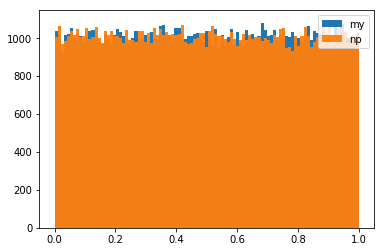

In [28]:
bins = np.linspace(0, 1, 100)

plt.hist(seq1, bins, alpha=1.0, label='my')
plt.hist(np.random.rand(100000), bins, alpha=0.95, label='np')
plt.legend(loc='upper right')

plt.show()

#Задание 3

In [0]:
mu = 2
sigma = 1

a = -14
b = 18

In [0]:
def inverse():
  p = next(gen_2)
  return mu + sigma * np.log(p / (1 - p))

#Задание 4

In [0]:
def maxLogistic(sigma):
  return 1 / (4*sigma)

maxF = maxLogistic(sigma)


def logisticF(x, mean, std):
  return np.exp(-(mean - x) / sigma) / (sigma * np.square(1 + np.exp(-(mean - x)/sigma)))


def n_p(): #neyman-pirson
  y1 = a + (b-a) * next(gen_2)
  y2 = maxF * next(gen_2)
  while y2 > logisticF(y1, mu, sigma):
    y1 = a + (b-a) * next(gen_2)
    y2 = maxF * next(gen_2)
  return y1
  

#Задание 5

In [0]:
np_dist = np.random.logistic(2, 1, 1_000_000)

#Задание 6

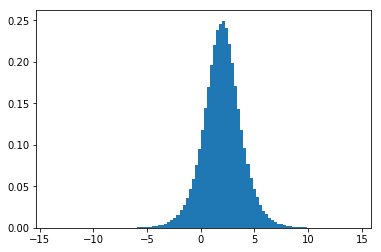

In [33]:
neyman_dist = [n_p() for _ in range(1_000_000)]
n, bins, patches = plt.hist(neyman_dist, 100, density=1)

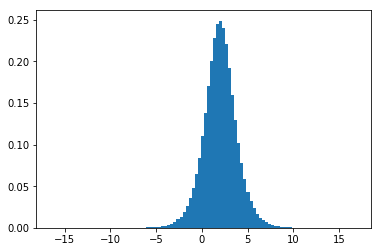

In [34]:
inverse_dist = [inverse() for _ in range(1_000_000)]
n, bins, patches = plt.hist(inverse_dist, 100, density=1)

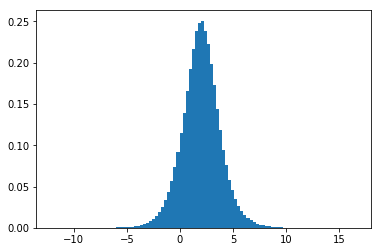

In [35]:

n, bins, patches = plt.hist(np_dist, 100, density=1)

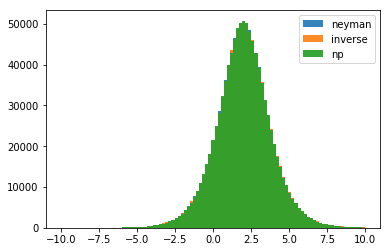

In [36]:
bins = np.linspace(-10, 10, 100)

plt.hist(neyman_dist, bins, alpha=0.9, label='neyman')
plt.hist(inverse_dist, bins, alpha=0.9, label='inverse')
plt.hist(np_dist, bins, alpha=0.95, label='np')
plt.legend(loc='upper right')

plt.show()

#Задание 7

In [0]:
sums = [i+j for i in range(1, 7) for j in range(1, 7)]
probs = [sums.count(i) / len(sums) for i in set(sums)]
cum_prob = [sum(probs[:i]) for i in range(1, len(probs)+1)]

In [0]:
def dice():
  rnd = next(gen_2)
  for i in range(len(cum_prob)):
    if rnd < cum_prob[i]:
      return i + 2

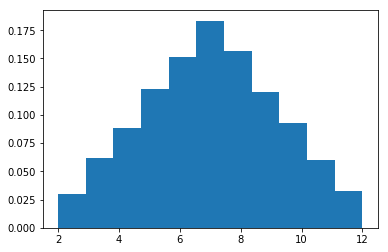

In [40]:
plt.hist([dice() for i in range(30000)], 11, density=1);